In [1293]:
# read data from .arff files
import os
import warnings
warnings.filterwarnings('ignore')
import sktime
from sktime.datasets import load_from_tsfile
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
# import stats
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# load data from .ts files
train_x, train_y = load_from_tsfile(
    "./datasets/racket/RacketSports_TRAIN.ts"
)
test_x, test_y = load_from_tsfile(
    "./datasets/racket/RacketSports_TEST.ts"
)

<Axes: title={'center': 'Train data'}>

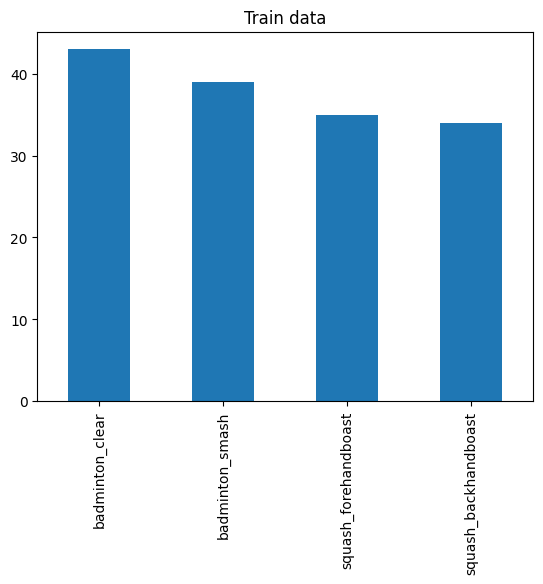

In [1294]:
# Train data

# create a dataframe from the data and labels 
train_df = pd.DataFrame(train_x)
train_df['label'] = train_y
# add column names
train_df.columns = ['x_acc', 'y_acc', 'z_acc','x_giro', 'y_giro', 'z_giro', 'label']

# create a plot bar from the dataframe using pandas.plot.bar
train_df['label'].value_counts().plot.bar(title = "Train data")

<Axes: title={'center': 'Test data'}>

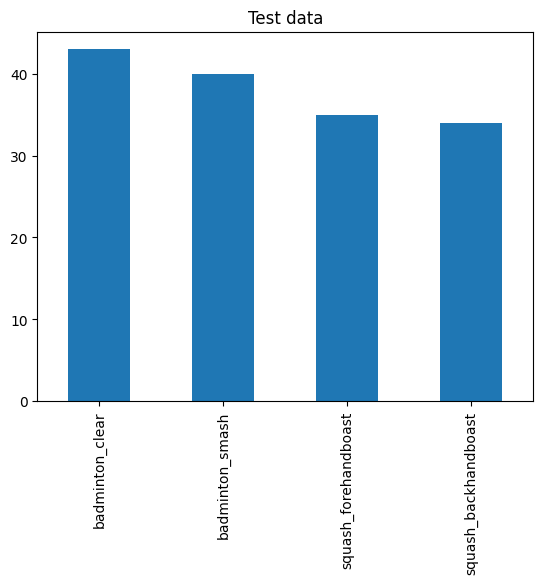

In [1295]:
# Test data

# create a dataframe from the data and labels 
test_df = pd.DataFrame(test_x)
test_df['label'] = test_y
# add column names
test_df.columns = ['x_acc', 'y_acc', 'z_acc','x_giro', 'y_giro', 'z_giro', 'label']

# create a plot bar from the dataframe using pandas.plot.bar
test_df['label'].value_counts().plot.bar(title = "Test data")

<Axes: title={'center': 'Train and Test data'}>

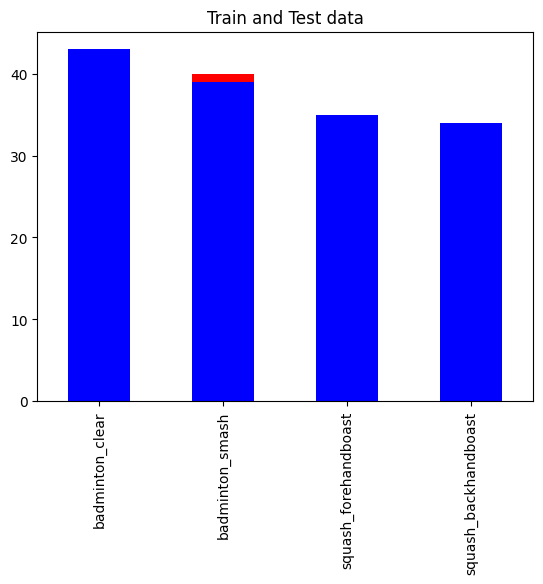

In [1296]:
# put test_df and train_df on the same plot bar with different colors 
test_df['label'].value_counts().plot.bar(color = 'red', alpha = 1)
train_df['label'].value_counts().plot.bar(title = "Train and Test data", color = 'blue', alpha =1)


In [1297]:
# extract unique labels from the data
labels = train_df['label'].unique()
counts_train = train_df['label'].value_counts()
counts_test= test_df['label'].value_counts()


print(labels)
print("----------------------------------")
print("TRAIN: "+  str(counts_train))
print("----------------------------------")
print("TEST: " + str(counts_test))



['badminton_smash' 'badminton_clear' 'squash_forehandboast'
 'squash_backhandboast']
----------------------------------
TRAIN: badminton_clear         43
badminton_smash         39
squash_forehandboast    35
squash_backhandboast    34
Name: label, dtype: int64
----------------------------------
TEST: badminton_clear         43
badminton_smash         40
squash_forehandboast    35
squash_backhandboast    34
Name: label, dtype: int64


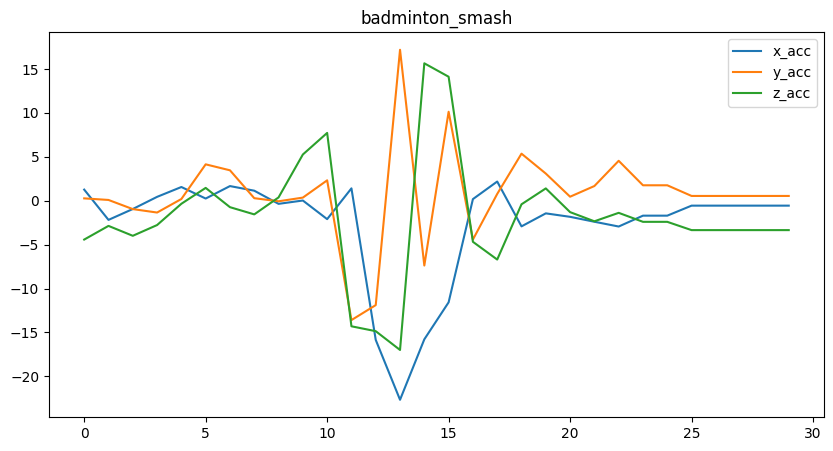

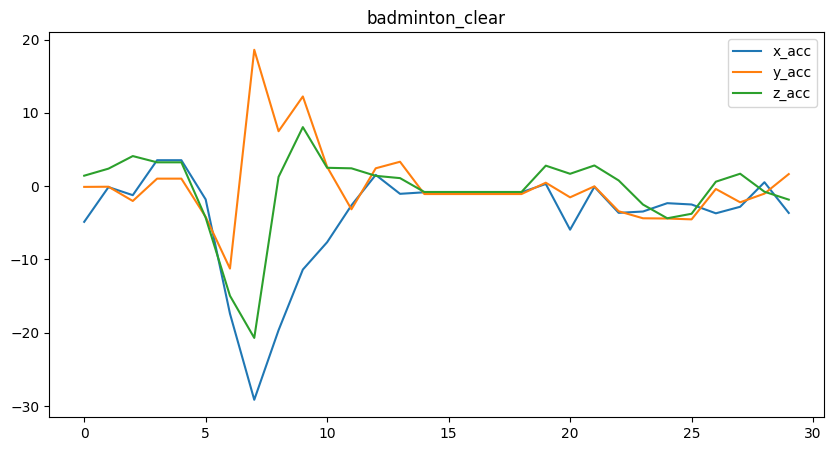

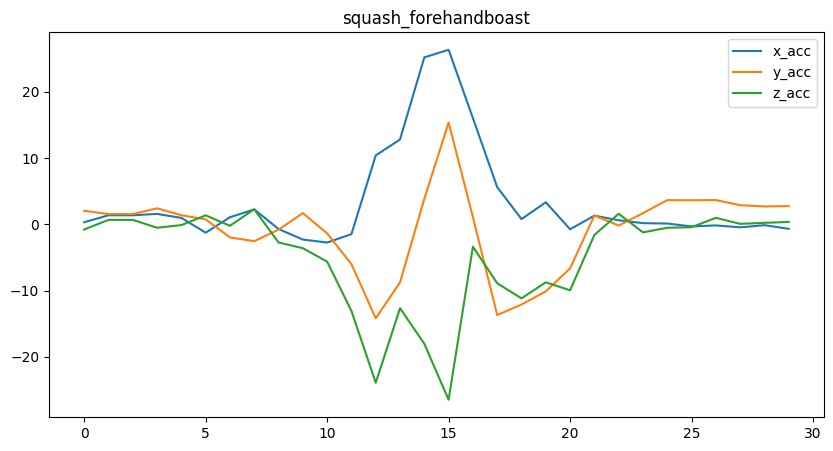

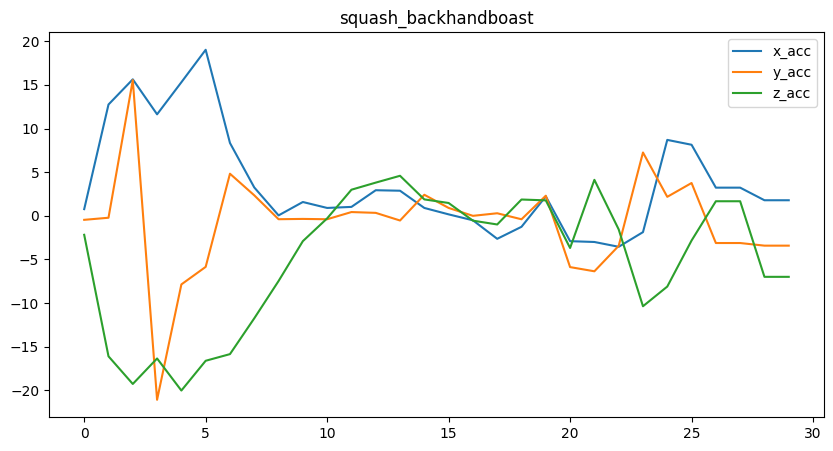

In [1298]:
# for each label, print an example for accelerometer data
for label in labels:
    current = train_df[train_df['label'] == label].iloc[0]

    current_pd = pd.DataFrame({
        'x_acc': current['x_acc'],
        'y_acc': current['y_acc'],
        'z_acc': current['z_acc']
    })
    current_pd.plot(title = str(label), legend = True, label = ['x_acc', 'y_acc', 'z_acc'], figsize = (10, 5))
    

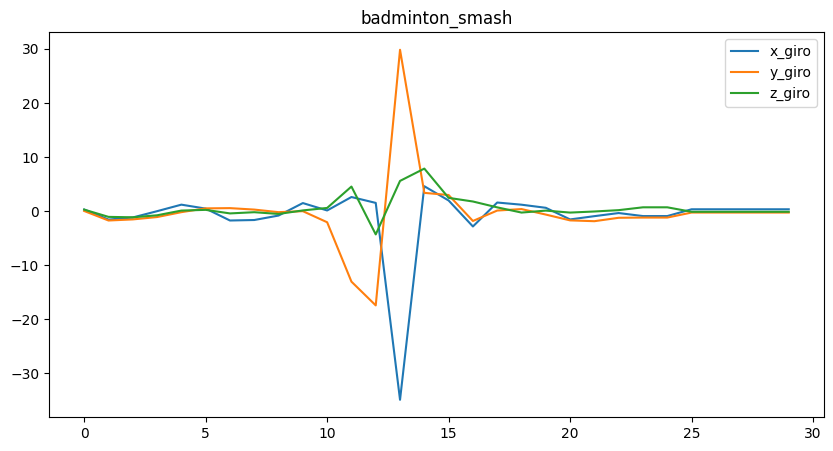

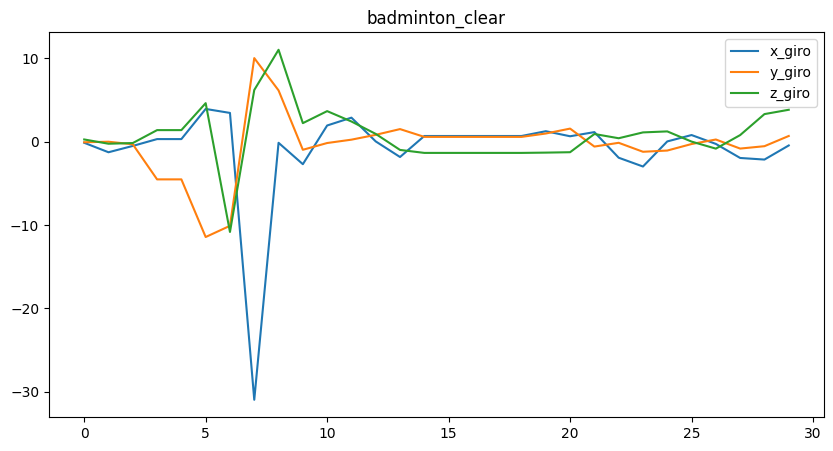

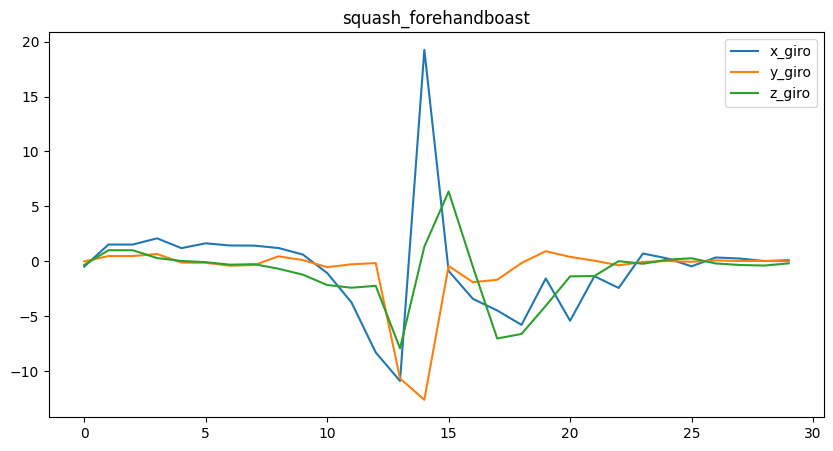

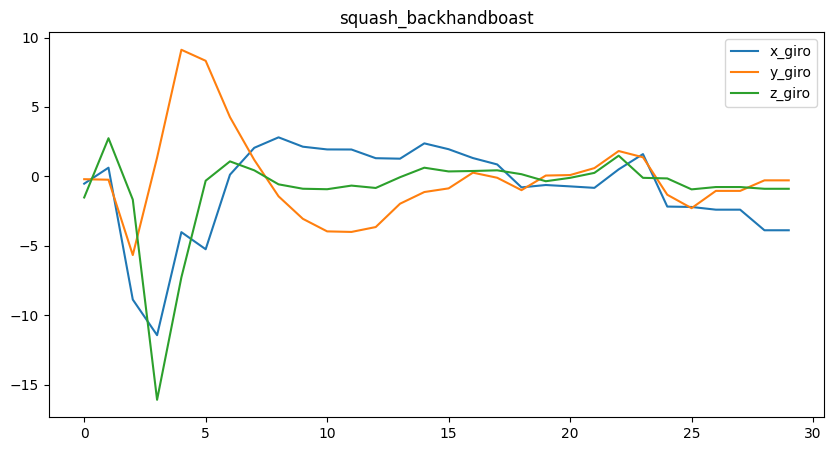

In [1299]:
# for each label, print an example for giroscope data
for label in labels:
    current = train_df[train_df['label'] == label].iloc[0]

    current_pd = pd.DataFrame({
        'x_giro': current['x_giro'],
        'y_giro': current['y_giro'],
        'z_giro': current['z_giro']
    })
    current_pd.plot(title = str(label), legend = True, label = ['x_giro', 'y_giro', 'z_giro'], figsize = (10, 5))    

In [1300]:
# import sns
import seaborn as sns
# import plt
import matplotlib.pyplot as plt
# make a copy of train_df
train_df_copy = train_df.copy()

# for each column exept label replace the values with the mean of the column
for col in train_df.columns:
    if col != 'label':
        train_df_copy[col] = train_df_copy[col].apply(lambda x: x.mean())

train_df_copy


,x_acc,y_acc,z_acc,x_giro,y_giro,z_giro,label
0,-2.633486,0.698630,-1.838858,-0.989798,-0.331767,0.551318,badminton_smash
1,2.358459,-0.013185,-2.105579,-0.700112,0.524063,-0.404389,badminton_smash
2,4.966444,-1.965019,-1.994086,0.023704,0.766874,-0.360443,badminton_smash
3,-4.189178,2.387300,-1.623857,-2.481642,0.974794,-0.325642,badminton_smash
4,2.990686,-0.884455,-0.818460,-0.310194,1.242907,0.915490,badminton_smash
...,...,...,...,...,...,...,...
146,3.969377,1.495273,-2.499271,0.994415,-0.774953,-0.354317,squash_backhandboast
147,4.812887,-1.018456,-1.203562,0.039418,-0.003818,-0.345084,squash_backhandboast
148,5.507909,-0.061900,-3.413293,0.543062,0.239082,-0.506573,squash_backhandboast
149,3.269166,0.228282,-3.525194,-0.537646,-0.290041,-0.723194,squash_backhandboast


<Figure size 4500x1000 with 0 Axes>

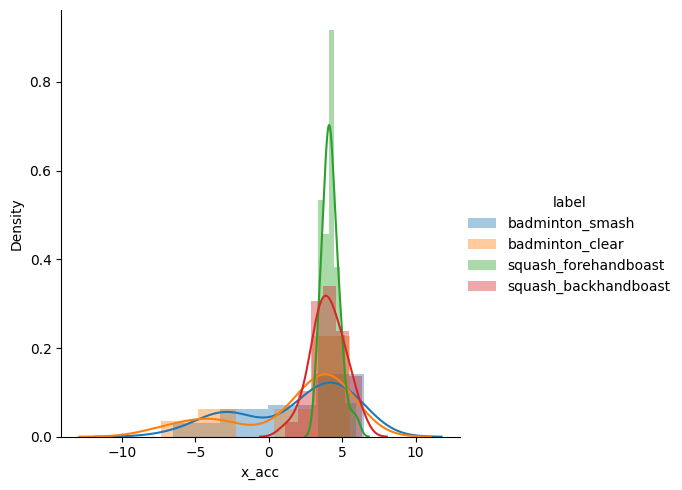

In [1301]:
plt.figure(figsize=(45,10))
sns.FacetGrid(train_df_copy, hue = 'label', height=5).map(sns.distplot, 'x_acc').add_legend()
plt.show()

<Figure size 4500x1000 with 0 Axes>

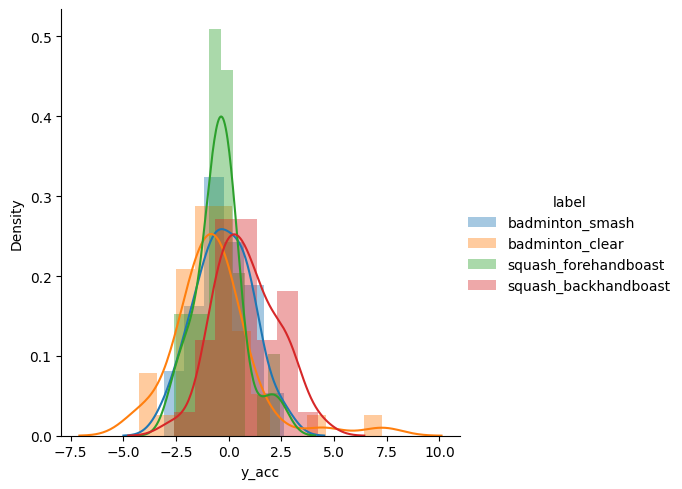

In [1302]:
plt.figure(figsize=(45,10))
sns.FacetGrid(train_df_copy, hue = 'label', height=5).map(sns.distplot, 'y_acc').add_legend()
plt.show()


<Figure size 4500x1000 with 0 Axes>

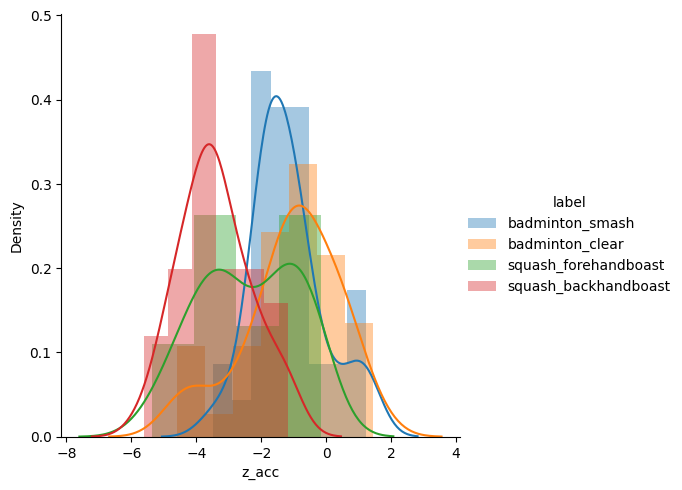

In [1303]:
plt.figure(figsize=(45,10))
sns.FacetGrid(train_df_copy, hue = 'label', height=5).map(sns.distplot, 'z_acc').add_legend()
plt.show()


<Figure size 4500x1000 with 0 Axes>

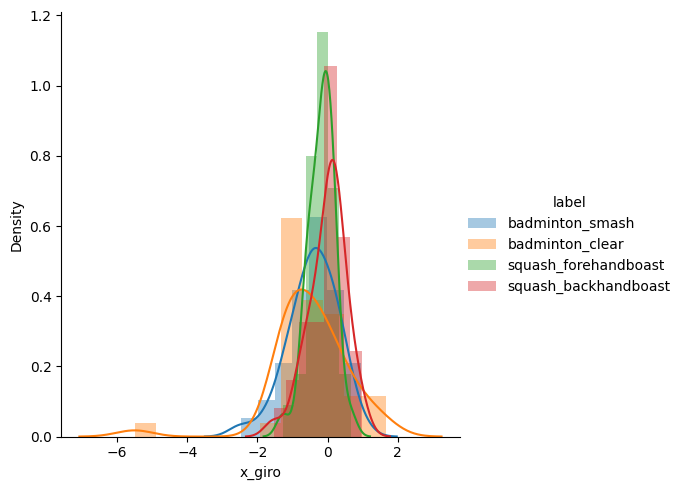

In [1304]:
plt.figure(figsize=(45,10))
sns.FacetGrid(train_df_copy, hue = 'label', height=5).map(sns.distplot, 'x_giro').add_legend()
plt.show()


<Figure size 4500x1000 with 0 Axes>

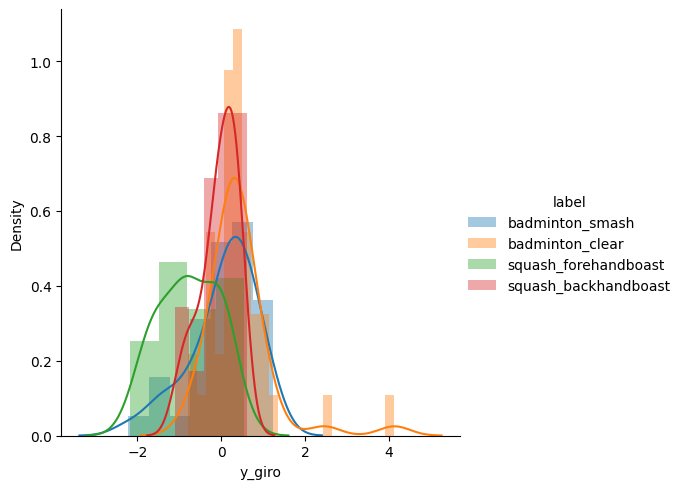

In [1305]:
plt.figure(figsize=(45,10))
sns.FacetGrid(train_df_copy, hue = 'label', height=5).map(sns.distplot, 'y_giro').add_legend()
plt.show()


<Figure size 4500x1000 with 0 Axes>

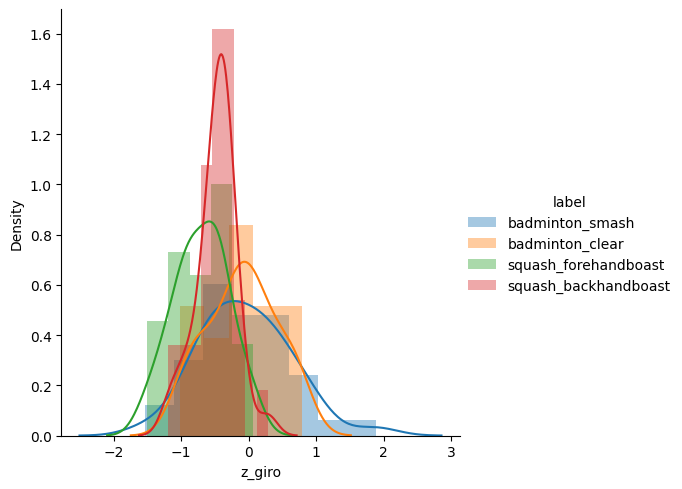

In [1306]:
plt.figure(figsize=(45,10))
sns.FacetGrid(train_df_copy, hue = 'label', height=5).map(sns.distplot, 'z_giro').add_legend()
plt.show()


3.2.2. Extragerea atributelor

In [1307]:
X_train = pd.DataFrame()

# Mean features
X_train['x_acc_mean'] = train_df['x_acc'].apply(lambda x: x.mean())
X_train['y_acc_mean'] = train_df['y_acc'].apply(lambda x: x.mean())
X_train['z_acc_mean'] = train_df['z_acc'].apply(lambda x: x.mean())
X_train['x_giro_mean'] = train_df['x_giro'].apply(lambda x: x.mean())
X_train['y_giro_mean'] = train_df['y_giro'].apply(lambda x: x.mean())
X_train['z_giro_mean'] = train_df['z_giro'].apply(lambda x: x.mean())

# Standard deviation features
X_train['x_acc_std'] = train_df['x_acc'].apply(lambda x: x.std())
X_train['y_acc_std'] = train_df['y_acc'].apply(lambda x: x.std())
X_train['z_acc_std'] = train_df['z_acc'].apply(lambda x: x.std())
X_train['x_giro_std'] = train_df['x_giro'].apply(lambda x: x.std())
X_train['y_giro_std'] = train_df['y_giro'].apply(lambda x: x.std())
X_train['z_giro_std'] = train_df['z_giro'].apply(lambda x: x.std())

# Average absolute difference features
X_train['x_acc_aad'] = train_df['x_acc'].apply(lambda x: np.mean(np.abs(np.diff(x))))
X_train['y_acc_aad'] = train_df['y_acc'].apply(lambda x: np.mean(np.abs(np.diff(x))))
X_train['z_acc_aad'] = train_df['z_acc'].apply(lambda x: np.mean(np.abs(np.diff(x))))
X_train['x_giro_aad'] = train_df['x_giro'].apply(lambda x: np.mean(np.abs(np.diff(x))))
X_train['y_giro_aad'] = train_df['y_giro'].apply(lambda x: np.mean(np.abs(np.diff(x))))
X_train['z_giro_aad'] = train_df['z_giro'].apply(lambda x: np.mean(np.abs(np.diff(x))))

# Min features
X_train['x_acc_min'] = train_df['x_acc'].apply(lambda x: x.min())
X_train['y_acc_min'] = train_df['y_acc'].apply(lambda x: x.min())
X_train['z_acc_min'] = train_df['z_acc'].apply(lambda x: x.min())
X_train['x_giro_min'] = train_df['x_giro'].apply(lambda x: x.min())
X_train['y_giro_min'] = train_df['y_giro'].apply(lambda x: x.min())
X_train['z_giro_min'] = train_df['z_giro'].apply(lambda x: x.min())

# Max features
X_train['x_acc_max'] = train_df['x_acc'].apply(lambda x: x.max())
X_train['y_acc_max'] = train_df['y_acc'].apply(lambda x: x.max())
X_train['z_acc_max'] = train_df['z_acc'].apply(lambda x: x.max())
X_train['x_giro_max'] = train_df['x_giro'].apply(lambda x: x.max())
X_train['y_giro_max'] = train_df['y_giro'].apply(lambda x: x.max())
X_train['z_giro_max'] = train_df['z_giro'].apply(lambda x: x.max())

# Max-min features
X_train['x_acc_max-min'] = X_train['x_acc_max'] - X_train['x_acc_min']
X_train['y_acc_max-min'] = X_train['y_acc_max'] - X_train['y_acc_min']
X_train['z_acc_max-min'] = X_train['z_acc_max'] - X_train['z_acc_min']
X_train['x_giro_max-min'] = X_train['x_giro_max'] - X_train['x_giro_min']
X_train['y_giro_max-min'] = X_train['y_giro_max'] - X_train['y_giro_min']
X_train['z_giro_max-min'] = X_train['z_giro_max'] - X_train['z_giro_min']

# Median features
X_train['x_acc_median'] = train_df['x_acc'].apply(lambda x: x.median())
X_train['y_acc_median'] = train_df['y_acc'].apply(lambda x: x.median())
X_train['z_acc_median'] = train_df['z_acc'].apply(lambda x: x.median())
X_train['x_giro_median'] = train_df['x_giro'].apply(lambda x: x.median())
X_train['y_giro_median'] = train_df['y_giro'].apply(lambda x: x.median())
X_train['z_giro_median'] = train_df['z_giro'].apply(lambda x: x.median())

# Median absolute deviation features
X_train['x_acc_mad'] = train_df['x_acc'].apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_acc_mad'] = train_df['y_acc'].apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_acc_mad'] = train_df['z_acc'].apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['x_giro_mad'] = train_df['x_giro'].apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_giro_mad'] = train_df['y_giro'].apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_giro_mad'] = train_df['z_giro'].apply(lambda x: np.median(np.absolute(x - np.median(x))))

# Interquartile range features
X_train['x_acc_iqr'] = train_df['x_acc'].apply(lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_train['y_acc_iqr'] = train_df['y_acc'].apply(lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_train['z_acc_iqr'] = train_df['z_acc'].apply(lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_train['x_giro_iqr'] = train_df['x_giro'].apply(lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_train['y_giro_iqr'] = train_df['y_giro'].apply(lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_train['z_giro_iqr'] = train_df['z_giro'].apply(lambda x: np.subtract(*np.percentile(x, [75, 25])))

# Negative features
X_train['x_acc_neg'] = train_df['x_acc'].apply(lambda x: np.sum(x < 0))
X_train['y_acc_neg'] = train_df['y_acc'].apply(lambda x: np.sum(x < 0))
X_train['z_acc_neg'] = train_df['z_acc'].apply(lambda x: np.sum(x < 0))
X_train['x_giro_neg'] = train_df['x_giro'].apply(lambda x: np.sum(x < 0))
X_train['y_giro_neg'] = train_df['y_giro'].apply(lambda x: np.sum(x < 0))
X_train['z_giro_neg'] = train_df['z_giro'].apply(lambda x: np.sum(x < 0))

# Positive features
X_train['x_acc_pos'] = train_df['x_acc'].apply(lambda x: np.sum(x > 0))
X_train['y_acc_pos'] = train_df['y_acc'].apply(lambda x: np.sum(x > 0))
X_train['z_acc_pos'] = train_df['z_acc'].apply(lambda x: np.sum(x > 0))
X_train['x_giro_pos'] = train_df['x_giro'].apply(lambda x: np.sum(x > 0))
X_train['y_giro_pos'] = train_df['y_giro'].apply(lambda x: np.sum(x > 0))
X_train['z_giro_pos'] = train_df['z_giro'].apply(lambda x: np.sum(x > 0))

# Values above mean features
X_train['x_acc_above_mean'] = train_df['x_acc'].apply(lambda x: np.sum(x > x.mean()))
X_train['y_acc_above_mean'] = train_df['y_acc'].apply(lambda x: np.sum(x > x.mean()))
X_train['z_acc_above_mean'] = train_df['z_acc'].apply(lambda x: np.sum(x > x.mean()))
X_train['x_giro_above_mean'] = train_df['x_giro'].apply(lambda x: np.sum(x > x.mean()))
X_train['y_giro_above_mean'] = train_df['y_giro'].apply(lambda x: np.sum(x > x.mean()))
X_train['z_giro_above_mean'] = train_df['z_giro'].apply(lambda x: np.sum(x > x.mean()))

# Number of peaks features
X_train['x_acc_peaks'] = train_df['x_acc'].apply(lambda x: len(find_peaks(x)[0]))
X_train['y_acc_peaks'] = train_df['y_acc'].apply(lambda x: len(find_peaks(x)[0]))
X_train['z_acc_peaks'] = train_df['z_acc'].apply(lambda x: len(find_peaks(x)[0]))
X_train['x_giro_peaks'] = train_df['x_giro'].apply(lambda x: len(find_peaks(x)[0]))
X_train['y_giro_peaks'] = train_df['y_giro'].apply(lambda x: len(find_peaks(x)[0]))
X_train['z_giro_peaks'] = train_df['z_giro'].apply(lambda x: len(find_peaks(x)[0]))

# Skewnness features
X_train['x_acc_skew'] = train_df['x_acc'].apply(lambda x: stats.skew(x))
X_train['y_acc_skew'] = train_df['y_acc'].apply(lambda x: stats.skew(x))
X_train['z_acc_skew'] = train_df['z_acc'].apply(lambda x: stats.skew(x))
X_train['x_giro_skew'] = train_df['x_giro'].apply(lambda x: stats.skew(x))
X_train['y_giro_skew'] = train_df['y_giro'].apply(lambda x: stats.skew(x))
X_train['z_giro_skew'] = train_df['z_giro'].apply(lambda x: stats.skew(x))

# Kurtosis features
X_train['x_acc_kurt'] = train_df['x_acc'].apply(lambda x: stats.kurtosis(x))
X_train['y_acc_kurt'] = train_df['y_acc'].apply(lambda x: stats.kurtosis(x))
X_train['z_acc_kurt'] = train_df['z_acc'].apply(lambda x: stats.kurtosis(x))
X_train['x_giro_kurt'] = train_df['x_giro'].apply(lambda x: stats.kurtosis(x))
X_train['y_giro_kurt'] = train_df['y_giro'].apply(lambda x: stats.kurtosis(x))
X_train['z_giro_kurt'] = train_df['z_giro'].apply(lambda x: stats.kurtosis(x))

# Energy features
X_train['x_acc_energy'] = train_df['x_acc'].apply(lambda x: np.sum(x**2)/100)
X_train['y_acc_energy'] = train_df['y_acc'].apply(lambda x: np.sum(x**2)/100)
X_train['z_acc_energy'] = train_df['z_acc'].apply(lambda x: np.sum(x**2)/100)
X_train['x_giro_energy'] = train_df['x_giro'].apply(lambda x: np.sum(x**2)/100)
X_train['y_giro_energy'] = train_df['y_giro'].apply(lambda x: np.sum(x**2)/100)
X_train['z_giro_energy'] = train_df['z_giro'].apply(lambda x: np.sum(x**2)/100)

# Average 
X_train['avg_result_acc'] = [i.mean() for i in ((train_df['x_acc']**2 + train_df['y_acc']**2 + train_df['z_acc']**2)**0.5)]

X_train['avg_result_giro'] = [i.mean() for i in ((train_df['x_giro']**2 + train_df['y_giro']**2 + train_df['z_giro']**2)**0.5)]

# Signal magnitude area features acc
X_train['acc_sma'] =    train_df['x_acc'].apply(lambda x: np.sum(abs(x)/100)) + train_df['y_acc'].apply(lambda x: np.sum(abs(x)/100)) \
                  + train_df['z_acc'].apply(lambda x: np.sum(abs(x)/100))

# Signal magnitude area features giro
X_train['giro_sma'] =   train_df['x_giro'].apply(lambda x: np.sum(abs(x)/100)) + train_df['y_giro'].apply(lambda x: np.sum(abs(x)/100)) \
                    + train_df['z_giro'].apply(lambda x: np.sum(abs(x)/100))


# Add FFT features to the dataframe
x_acc_fft = train_df['x_acc'].apply(lambda x: np.abs(np.fft.fft(x)))
y_acc_fft = train_df['y_acc'].apply(lambda x: np.abs(np.fft.fft(x)))
z_acc_fft = train_df['z_acc'].apply(lambda x: np.abs(np.fft.fft(x)))
x_giro_fft = train_df['x_giro'].apply(lambda x: np.abs(np.fft.fft(x)))
y_giro_fft = train_df['y_giro'].apply(lambda x: np.abs(np.fft.fft(x)))
z_giro_fft = train_df['z_giro'].apply(lambda x: np.abs(np.fft.fft(x)))

# FFT mean features
X_train['x_acc_fft_mean'] = x_acc_fft.apply(lambda x: np.abs(x).mean())
X_train['y_acc_fft_mean'] = y_acc_fft.apply(lambda x: np.abs(x).mean())
X_train['z_acc_fft_mean'] = z_acc_fft.apply(lambda x: np.abs(x).mean())
X_train['x_giro_fft_mean'] = x_giro_fft.apply(lambda x: np.abs(x).mean())
X_train['y_giro_fft_mean'] = y_giro_fft.apply(lambda x: np.abs(x).mean())
X_train['z_giro_fft_mean'] = z_giro_fft.apply(lambda x: np.abs(x).mean())

# FFT std features
X_train['x_acc_fft_std'] = x_acc_fft.apply(lambda x: x.std())
X_train['y_acc_fft_std'] = y_acc_fft.apply(lambda x: x.std())
X_train['z_acc_fft_std'] = z_acc_fft.apply(lambda x: x.std())
X_train['x_giro_fft_std'] = x_giro_fft.apply(lambda x: x.std())
X_train['y_giro_fft_std'] = y_giro_fft.apply(lambda x: x.std())
X_train['z_giro_fft_std'] = z_giro_fft.apply(lambda x: x.std())

# FFT absolute difference features
X_train['x_acc_fft_abs_diff'] = x_acc_fft.apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_acc_fft_abs_diff'] = y_acc_fft.apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_acc_fft_abs_diff'] = z_acc_fft.apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['x_giro_fft_abs_diff'] = x_giro_fft.apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_giro_fft_abs_diff'] = y_giro_fft.apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_giro_fft_abs_diff'] = z_giro_fft.apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min features
X_train['x_acc_fft_min'] = x_acc_fft.apply(lambda x: x.min())
X_train['y_acc_fft_min'] = y_acc_fft.apply(lambda x: x.min())
X_train['z_acc_fft_min'] = z_acc_fft.apply(lambda x: x.min())
X_train['x_giro_fft_min'] = x_giro_fft.apply(lambda x: x.min())
X_train['y_giro_fft_min'] = y_giro_fft.apply(lambda x: x.min())
X_train['z_giro_fft_min'] = z_giro_fft.apply(lambda x: x.min())

# FFT max features
X_train['x_acc_fft_max'] = x_acc_fft.apply(lambda x: x.max())
X_train['y_acc_fft_max'] = y_acc_fft.apply(lambda x: x.max())
X_train['z_acc_fft_max'] = z_acc_fft.apply(lambda x: x.max())
X_train['x_giro_fft_max'] = x_giro_fft.apply(lambda x: x.max())
X_train['y_giro_fft_max'] = y_giro_fft.apply(lambda x: x.max())
X_train['z_giro_fft_max'] = z_giro_fft.apply(lambda x: x.max())

# FFT max-min features
X_train['x_acc_fft_max_min'] = X_train['x_acc_fft_max'] - X_train['x_acc_fft_min']
X_train['y_acc_fft_max_min'] = X_train['y_acc_fft_max'] - X_train['y_acc_fft_min']
X_train['z_acc_fft_max_min'] = X_train['z_acc_fft_max'] - X_train['z_acc_fft_min']
X_train['x_giro_fft_max_min'] = X_train['x_giro_fft_max'] - X_train['x_giro_fft_min']
X_train['y_giro_fft_max_min'] = X_train['y_giro_fft_max'] - X_train['y_giro_fft_min']
X_train['z_giro_fft_max_min'] = X_train['z_giro_fft_max'] - X_train['z_giro_fft_min']

# FFT median features
X_train['x_acc_fft_median'] = x_acc_fft.apply(lambda x: np.median(x))
X_train['y_acc_fft_median'] = y_acc_fft.apply(lambda x: np.median(x))
X_train['z_acc_fft_median'] = z_acc_fft.apply(lambda x: np.median(x))
X_train['x_giro_fft_median'] = x_giro_fft.apply(lambda x: np.median(x))
X_train['y_giro_fft_median'] = y_giro_fft.apply(lambda x: np.median(x))
X_train['z_giro_fft_median'] = z_giro_fft.apply(lambda x: np.median(x))

# FFT median abs deviation features
X_train['x_acc_fft_median_abs_dev'] = x_acc_fft.apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_acc_fft_median_abs_dev'] = y_acc_fft.apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_acc_fft_median_abs_dev'] = z_acc_fft.apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['x_giro_fft_median_abs_dev'] = x_giro_fft.apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_giro_fft_median_abs_dev'] = y_giro_fft.apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_giro_fft_median_abs_dev'] = z_giro_fft.apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT interquartile range features
X_train['x_acc_fft_iqr'] = x_acc_fft.apply(lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_train['y_acc_fft_iqr'] = y_acc_fft.apply(lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_train['z_acc_fft_iqr'] = z_acc_fft.apply(lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_train['x_giro_fft_iqr'] = x_giro_fft.apply(lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_train['y_giro_fft_iqr'] = y_giro_fft.apply(lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_train['z_giro_fft_iqr'] = z_giro_fft.apply(lambda x: np.subtract(*np.percentile(x, [75, 25])))

# FFT values above mean features
X_train['x_acc_fft_above_mean'] = x_acc_fft.apply(lambda x: np.sum(x > x.mean()))
X_train['y_acc_fft_above_mean'] = y_acc_fft.apply(lambda x: np.sum(x > x.mean()))
X_train['z_acc_fft_above_mean'] = z_acc_fft.apply(lambda x: np.sum(x > x.mean()))
X_train['x_giro_fft_above_mean'] = x_giro_fft.apply(lambda x: np.sum(x > x.mean()))
X_train['y_giro_fft_above_mean'] = y_giro_fft.apply(lambda x: np.sum(x > x.mean()))
X_train['z_giro_fft_above_mean'] = z_giro_fft.apply(lambda x: np.sum(x > x.mean()))

# FFT peaks features
X_train['x_acc_fft_peaks'] = x_acc_fft.apply(lambda x: len(find_peaks(x)[0]))
X_train['y_acc_fft_peaks'] = y_acc_fft.apply(lambda x: len(find_peaks(x)[0]))
X_train['z_acc_fft_peaks'] = z_acc_fft.apply(lambda x: len(find_peaks(x)[0]))
X_train['x_giro_fft_peaks'] = x_giro_fft.apply(lambda x: len(find_peaks(x)[0]))
X_train['y_giro_fft_peaks'] = y_giro_fft.apply(lambda x: len(find_peaks(x)[0]))
X_train['z_giro_fft_peaks'] = z_giro_fft.apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness features
X_train['x_acc_fft_skew'] = x_acc_fft.apply(lambda x: stats.skew(x))
X_train['y_acc_fft_skew'] = y_acc_fft.apply(lambda x: stats.skew(x))
X_train['z_acc_fft_skew'] = z_acc_fft.apply(lambda x: stats.skew(x))
X_train['x_giro_fft_skew'] = x_giro_fft.apply(lambda x: stats.skew(x))
X_train['y_giro_fft_skew'] = y_giro_fft.apply(lambda x: stats.skew(x))
X_train['z_giro_fft_skew'] = z_giro_fft.apply(lambda x: stats.skew(x))

# FFT kurtosis features
X_train['x_acc_fft_kurtosis'] = x_acc_fft.apply(lambda x: stats.kurtosis(x))
X_train['y_acc_fft_kurtosis'] = y_acc_fft.apply(lambda x: stats.kurtosis(x))
X_train['z_acc_fft_kurtosis'] = z_acc_fft.apply(lambda x: stats.kurtosis(x))
X_train['x_giro_fft_kurtosis'] = x_giro_fft.apply(lambda x: stats.kurtosis(x))
X_train['y_giro_fft_kurtosis'] = y_giro_fft.apply(lambda x: stats.kurtosis(x))
X_train['z_giro_fft_kurtosis'] = z_giro_fft.apply(lambda x: stats.kurtosis(x))

# FFT energy features
X_train['x_acc_fft_energy'] = x_acc_fft.apply(lambda x: np.sum(x**2)/50)
X_train['y_acc_fft_energy'] = y_acc_fft.apply(lambda x: np.sum(x**2)/50)
X_train['z_acc_fft_energy'] = z_acc_fft.apply(lambda x: np.sum(x**2)/50)
X_train['x_giro_fft_energy'] = x_giro_fft.apply(lambda x: np.sum(x**2)/50)
X_train['y_giro_fft_energy'] = y_giro_fft.apply(lambda x: np.sum(x**2)/50)
X_train['z_giro_fft_energy'] = z_giro_fft.apply(lambda x: np.sum(x**2)/50)

# FFT average acceleration features
X_train['avg_result_fft_acc'] = [i.mean() for i in ((x_acc_fft**2 + y_acc_fft**2 + z_acc_fft**2)**0.5)]
X_train['avg_result_fft_giro'] = [i.mean() for i in ((x_giro_fft**2 + y_giro_fft**2 + z_giro_fft**2)**0.5)]

# FFT 
X_train['acc_sma_fft'] =    x_acc_fft.apply(lambda x: np.sum(abs(x)/100)) + y_acc_fft.apply(lambda x: np.sum(abs(x)/100)) \
                  + z_acc_fft.apply(lambda x: np.sum(abs(x)/100))
X_train['giro_sma_fft'] =   x_giro_fft.apply(lambda x: np.sum(abs(x)/100)) + y_giro_fft.apply(lambda x: np.sum(abs(x)/100)) \
                    + z_giro_fft.apply(lambda x: np.sum(abs(x)/100))

# Index of max value in time domain feature
X_train['x_acc_argmax'] = train_df['x_acc'].apply(lambda x: np.argmax(x))
X_train['y_acc_argmax'] = train_df['y_acc'].apply(lambda x: np.argmax(x))
X_train['z_acc_argmax'] = train_df['z_acc'].apply(lambda x: np.argmax(x))
X_train['x_giro_argmax'] = train_df['x_giro'].apply(lambda x: np.argmax(x))
X_train['y_giro_argmax'] = train_df['y_giro'].apply(lambda x: np.argmax(x))
X_train['z_giro_argmax'] = train_df['z_giro'].apply(lambda x: np.argmax(x))

# Index of min value in time domain feature
X_train['x_acc_argmin'] = train_df['x_acc'].apply(lambda x: np.argmin(x))
X_train['y_acc_argmin'] = train_df['y_acc'].apply(lambda x: np.argmin(x))
X_train['z_acc_argmin'] = train_df['z_acc'].apply(lambda x: np.argmin(x))
X_train['x_giro_argmin'] = train_df['x_giro'].apply(lambda x: np.argmin(x))
X_train['y_giro_argmin'] = train_df['y_giro'].apply(lambda x: np.argmin(x))
X_train['z_giro_argmin'] = train_df['z_giro'].apply(lambda x: np.argmin(x))

# Difference between max and min value in time domain feature
X_train['x_acc_diff'] = abs(X_train['x_acc_argmax'] - X_train['x_acc_argmin'])
X_train['y_acc_diff'] = abs(X_train['y_acc_argmax'] - X_train['y_acc_argmin'])
X_train['z_acc_diff'] = abs(X_train['z_acc_argmax'] - X_train['z_acc_argmin'])
X_train['x_giro_diff'] = abs(X_train['x_giro_argmax'] - X_train['x_giro_argmin'])
X_train['y_giro_diff'] = abs(X_train['y_giro_argmax'] - X_train['y_giro_argmin'])
X_train['z_giro_diff'] = abs(X_train['z_giro_argmax'] - X_train['z_giro_argmin'])

# FFT Index of max value in time domain feature
X_train['x_acc_fft_argmax'] = x_acc_fft.apply(lambda x: np.argmax(x))
X_train['y_acc_fft_argmax'] = y_acc_fft.apply(lambda x: np.argmax(x))
X_train['z_acc_fft_argmax'] = z_acc_fft.apply(lambda x: np.argmax(x))
X_train['x_giro_fft_argmax'] = x_giro_fft.apply(lambda x: np.argmax(x))
X_train['y_giro_fft_argmax'] = y_giro_fft.apply(lambda x: np.argmax(x))
X_train['z_giro_fft_argmax'] = z_giro_fft.apply(lambda x: np.argmax(x))

# FFT Index of min value in time domain feature
X_train['x_acc_fft_argmin'] = x_acc_fft.apply(lambda x: np.argmin(x))
X_train['y_acc_fft_argmin'] = y_acc_fft.apply(lambda x: np.argmin(x))
X_train['z_acc_fft_argmin'] = z_acc_fft.apply(lambda x: np.argmin(x))
X_train['x_giro_fft_argmin'] = x_giro_fft.apply(lambda x: np.argmin(x))
X_train['y_giro_fft_argmin'] = y_giro_fft.apply(lambda x: np.argmin(x))
X_train['z_giro_fft_argmin'] = z_giro_fft.apply(lambda x: np.argmin(x))

# FFT Difference between max and min value in time domain feature
X_train['x_acc_fft_diff'] = abs(X_train['x_acc_fft_argmax'] - X_train['x_acc_fft_argmin'])
X_train['y_acc_fft_diff'] = abs(X_train['y_acc_fft_argmax'] - X_train['y_acc_fft_argmin'])
X_train['z_acc_fft_diff'] = abs(X_train['z_acc_fft_argmax'] - X_train['z_acc_fft_argmin'])
X_train['x_giro_fft_diff'] = abs(X_train['x_giro_fft_argmax'] - X_train['x_giro_fft_argmin'])
X_train['y_giro_fft_diff'] = abs(X_train['y_giro_fft_argmax'] - X_train['y_giro_fft_argmin'])
X_train['z_giro_fft_diff'] = abs(X_train['z_giro_fft_argmax'] - X_train['z_giro_fft_argmin'])

X_train.head()


,x_acc_mean,y_acc_mean,z_acc_mean,x_giro_mean,y_giro_mean,z_giro_mean,x_acc_std,y_acc_std,z_acc_std,x_giro_std,...,z_acc_fft_argmin,x_giro_fft_argmin,y_giro_fft_argmin,z_giro_fft_argmin,x_acc_fft_diff,y_acc_fft_diff,z_acc_fft_diff,x_giro_fft_diff,y_giro_fft_diff,z_giro_fft_diff
0,-2.633486,0.698630,-1.838858,-0.989798,-0.331767,0.551318,5.872765,5.543115,6.811971,6.571695,...,20,2,0,25,15,8,14,7,23,24
1,2.358459,-0.013185,-2.105579,-0.700112,0.524063,-0.404389,10.271522,6.445679,8.184746,3.260200,...,1,6,6,27,9,4,3,4,4,8
2,4.966444,-1.965019,-1.994086,0.023704,0.766874,-0.360443,6.833542,5.849914,6.908750,4.678266,...,9,0,13,6,13,7,9,6,14,5
3,-4.189178,2.387300,-1.623857,-2.481642,0.974794,-0.325642,8.731891,6.195796,6.148948,8.672300,...,23,15,15,1,7,12,12,15,9,24
4,2.990686,-0.884455,-0.818460,-0.310194,1.242907,0.915490,8.327126,7.305129,6.642731,3.110027,...,29,1,12,2,11,10,24,7,12,9


In [1308]:
X_test = pd.DataFrame()

# Mean features
X_test['x_acc_mean'] = test_df['x_acc'].apply(lambda x: x.mean())
X_test['y_acc_mean'] = test_df['y_acc'].apply(lambda x: x.mean())
X_test['z_acc_mean'] = test_df['z_acc'].apply(lambda x: x.mean())
X_test['x_giro_mean'] = test_df['x_giro'].apply(lambda x: x.mean())
X_test['y_giro_mean'] = test_df['y_giro'].apply(lambda x: x.mean())
X_test['z_giro_mean'] = test_df['z_giro'].apply(lambda x: x.mean())

# Standard deviation features
X_test['x_acc_std'] = test_df['x_acc'].apply(lambda x: x.std())
X_test['y_acc_std'] = test_df['y_acc'].apply(lambda x: x.std())
X_test['z_acc_std'] = test_df['z_acc'].apply(lambda x: x.std())
X_test['x_giro_std'] = test_df['x_giro'].apply(lambda x: x.std())
X_test['y_giro_std'] = test_df['y_giro'].apply(lambda x: x.std())
X_test['z_giro_std'] = test_df['z_giro'].apply(lambda x: x.std())

# Average absolute difference features
X_test['x_acc_aad'] = test_df['x_acc'].apply(
    lambda x: np.mean(np.abs(np.diff(x))))
X_test['y_acc_aad'] = test_df['y_acc'].apply(
    lambda x: np.mean(np.abs(np.diff(x))))
X_test['z_acc_aad'] = test_df['z_acc'].apply(
    lambda x: np.mean(np.abs(np.diff(x))))
X_test['x_giro_aad'] = test_df['x_giro'].apply(
    lambda x: np.mean(np.abs(np.diff(x))))
X_test['y_giro_aad'] = test_df['y_giro'].apply(
    lambda x: np.mean(np.abs(np.diff(x))))
X_test['z_giro_aad'] = test_df['z_giro'].apply(
    lambda x: np.mean(np.abs(np.diff(x))))

# Min features
X_test['x_acc_min'] = test_df['x_acc'].apply(lambda x: x.min())
X_test['y_acc_min'] = test_df['y_acc'].apply(lambda x: x.min())
X_test['z_acc_min'] = test_df['z_acc'].apply(lambda x: x.min())
X_test['x_giro_min'] = test_df['x_giro'].apply(lambda x: x.min())
X_test['y_giro_min'] = test_df['y_giro'].apply(lambda x: x.min())
X_test['z_giro_min'] = test_df['z_giro'].apply(lambda x: x.min())

# Max features
X_test['x_acc_max'] = test_df['x_acc'].apply(lambda x: x.max())
X_test['y_acc_max'] = test_df['y_acc'].apply(lambda x: x.max())
X_test['z_acc_max'] = test_df['z_acc'].apply(lambda x: x.max())
X_test['x_giro_max'] = test_df['x_giro'].apply(lambda x: x.max())
X_test['y_giro_max'] = test_df['y_giro'].apply(lambda x: x.max())
X_test['z_giro_max'] = test_df['z_giro'].apply(lambda x: x.max())

# Max-min features
X_test['x_acc_max-min'] = X_test['x_acc_max'] - X_test['x_acc_min']
X_test['y_acc_max-min'] = X_test['y_acc_max'] - X_test['y_acc_min']
X_test['z_acc_max-min'] = X_test['z_acc_max'] - X_test['z_acc_min']
X_test['x_giro_max-min'] = X_test['x_giro_max'] - X_test['x_giro_min']
X_test['y_giro_max-min'] = X_test['y_giro_max'] - X_test['y_giro_min']
X_test['z_giro_max-min'] = X_test['z_giro_max'] - X_test['z_giro_min']

# Median features
X_test['x_acc_median'] = test_df['x_acc'].apply(lambda x: x.median())
X_test['y_acc_median'] = test_df['y_acc'].apply(lambda x: x.median())
X_test['z_acc_median'] = test_df['z_acc'].apply(lambda x: x.median())
X_test['x_giro_median'] = test_df['x_giro'].apply(lambda x: x.median())
X_test['y_giro_median'] = test_df['y_giro'].apply(lambda x: x.median())
X_test['z_giro_median'] = test_df['z_giro'].apply(lambda x: x.median())

# Median absolute deviation features
X_test['x_acc_mad'] = test_df['x_acc'].apply(
    lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_acc_mad'] = test_df['y_acc'].apply(
    lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_acc_mad'] = test_df['z_acc'].apply(
    lambda x: np.median(np.absolute(x - np.median(x))))
X_test['x_giro_mad'] = test_df['x_giro'].apply(
    lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_giro_mad'] = test_df['y_giro'].apply(
    lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_giro_mad'] = test_df['z_giro'].apply(
    lambda x: np.median(np.absolute(x - np.median(x))))

# Interquartile range features
X_test['x_acc_iqr'] = test_df['x_acc'].apply(
    lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_test['y_acc_iqr'] = test_df['y_acc'].apply(
    lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_test['z_acc_iqr'] = test_df['z_acc'].apply(
    lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_test['x_giro_iqr'] = test_df['x_giro'].apply(
    lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_test['y_giro_iqr'] = test_df['y_giro'].apply(
    lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_test['z_giro_iqr'] = test_df['z_giro'].apply(
    lambda x: np.subtract(*np.percentile(x, [75, 25])))

# Negative features
X_test['x_acc_neg'] = test_df['x_acc'].apply(lambda x: np.sum(x < 0))
X_test['y_acc_neg'] = test_df['y_acc'].apply(lambda x: np.sum(x < 0))
X_test['z_acc_neg'] = test_df['z_acc'].apply(lambda x: np.sum(x < 0))
X_test['x_giro_neg'] = test_df['x_giro'].apply(lambda x: np.sum(x < 0))
X_test['y_giro_neg'] = test_df['y_giro'].apply(lambda x: np.sum(x < 0))
X_test['z_giro_neg'] = test_df['z_giro'].apply(lambda x: np.sum(x < 0))

# Positive features
X_test['x_acc_pos'] = test_df['x_acc'].apply(lambda x: np.sum(x > 0))
X_test['y_acc_pos'] = test_df['y_acc'].apply(lambda x: np.sum(x > 0))
X_test['z_acc_pos'] = test_df['z_acc'].apply(lambda x: np.sum(x > 0))
X_test['x_giro_pos'] = test_df['x_giro'].apply(lambda x: np.sum(x > 0))
X_test['y_giro_pos'] = test_df['y_giro'].apply(lambda x: np.sum(x > 0))
X_test['z_giro_pos'] = test_df['z_giro'].apply(lambda x: np.sum(x > 0))

# Values above mean features
X_test['x_acc_above_mean'] = test_df['x_acc'].apply(
    lambda x: np.sum(x > x.mean()))
X_test['y_acc_above_mean'] = test_df['y_acc'].apply(
    lambda x: np.sum(x > x.mean()))
X_test['z_acc_above_mean'] = test_df['z_acc'].apply(
    lambda x: np.sum(x > x.mean()))
X_test['x_giro_above_mean'] = test_df['x_giro'].apply(
    lambda x: np.sum(x > x.mean()))
X_test['y_giro_above_mean'] = test_df['y_giro'].apply(
    lambda x: np.sum(x > x.mean()))
X_test['z_giro_above_mean'] = test_df['z_giro'].apply(
    lambda x: np.sum(x > x.mean()))

# Number of peaks features
X_test['x_acc_peaks'] = test_df['x_acc'].apply(lambda x: len(find_peaks(x)[0]))
X_test['y_acc_peaks'] = test_df['y_acc'].apply(lambda x: len(find_peaks(x)[0]))
X_test['z_acc_peaks'] = test_df['z_acc'].apply(lambda x: len(find_peaks(x)[0]))
X_test['x_giro_peaks'] = test_df['x_giro'].apply(
    lambda x: len(find_peaks(x)[0]))
X_test['y_giro_peaks'] = test_df['y_giro'].apply(
    lambda x: len(find_peaks(x)[0]))
X_test['z_giro_peaks'] = test_df['z_giro'].apply(
    lambda x: len(find_peaks(x)[0]))

# Skewnness features
X_test['x_acc_skew'] = test_df['x_acc'].apply(lambda x: stats.skew(x))
X_test['y_acc_skew'] = test_df['y_acc'].apply(lambda x: stats.skew(x))
X_test['z_acc_skew'] = test_df['z_acc'].apply(lambda x: stats.skew(x))
X_test['x_giro_skew'] = test_df['x_giro'].apply(lambda x: stats.skew(x))
X_test['y_giro_skew'] = test_df['y_giro'].apply(lambda x: stats.skew(x))
X_test['z_giro_skew'] = test_df['z_giro'].apply(lambda x: stats.skew(x))

# Kurtosis features
X_test['x_acc_kurt'] = test_df['x_acc'].apply(lambda x: stats.kurtosis(x))
X_test['y_acc_kurt'] = test_df['y_acc'].apply(lambda x: stats.kurtosis(x))
X_test['z_acc_kurt'] = test_df['z_acc'].apply(lambda x: stats.kurtosis(x))
X_test['x_giro_kurt'] = test_df['x_giro'].apply(lambda x: stats.kurtosis(x))
X_test['y_giro_kurt'] = test_df['y_giro'].apply(lambda x: stats.kurtosis(x))
X_test['z_giro_kurt'] = test_df['z_giro'].apply(lambda x: stats.kurtosis(x))

# Energy features
X_test['x_acc_energy'] = test_df['x_acc'].apply(lambda x: np.sum(x**2)/100)
X_test['y_acc_energy'] = test_df['y_acc'].apply(lambda x: np.sum(x**2)/100)
X_test['z_acc_energy'] = test_df['z_acc'].apply(lambda x: np.sum(x**2)/100)
X_test['x_giro_energy'] = test_df['x_giro'].apply(lambda x: np.sum(x**2)/100)
X_test['y_giro_energy'] = test_df['y_giro'].apply(lambda x: np.sum(x**2)/100)
X_test['z_giro_energy'] = test_df['z_giro'].apply(lambda x: np.sum(x**2)/100)

# Average
X_test['avg_result_acc'] = [i.mean() for i in (
    (test_df['x_acc']**2 + test_df['y_acc']**2 + test_df['z_acc']**2)**0.5)]

X_test['avg_result_giro'] = [i.mean() for i in (
    (test_df['x_giro']**2 + test_df['y_giro']**2 + test_df['z_giro']**2)**0.5)]

# Signal magnitude area features acc
X_test['acc_sma'] = test_df['x_acc'].apply(lambda x: np.sum(abs(x)/100)) + test_df['y_acc'].apply(lambda x: np.sum(abs(x)/100)) \
    + test_df['z_acc'].apply(lambda x: np.sum(abs(x)/100))

# Signal magnitude area features giro
X_test['giro_sma'] = test_df['x_giro'].apply(lambda x: np.sum(abs(x)/100)) + test_df['y_giro'].apply(lambda x: np.sum(abs(x)/100)) \
    + test_df['z_giro'].apply(lambda x: np.sum(abs(x)/100))


# Add FFT features to the dataframe
x_acc_fft = test_df['x_acc'].apply(lambda x: np.abs(np.fft.fft(x)))
y_acc_fft = test_df['y_acc'].apply(lambda x: np.abs(np.fft.fft(x)))
z_acc_fft = test_df['z_acc'].apply(lambda x: np.abs(np.fft.fft(x)))
x_giro_fft = test_df['x_giro'].apply(lambda x: np.abs(np.fft.fft(x)))
y_giro_fft = test_df['y_giro'].apply(lambda x: np.abs(np.fft.fft(x)))
z_giro_fft = test_df['z_giro'].apply(lambda x: np.abs(np.fft.fft(x)))

# FFT mean features
X_test['x_acc_fft_mean'] = x_acc_fft.apply(lambda x: np.abs(x).mean())
X_test['y_acc_fft_mean'] = y_acc_fft.apply(lambda x: np.abs(x).mean())
X_test['z_acc_fft_mean'] = z_acc_fft.apply(lambda x: np.abs(x).mean())
X_test['x_giro_fft_mean'] = x_giro_fft.apply(lambda x: np.abs(x).mean())
X_test['y_giro_fft_mean'] = y_giro_fft.apply(lambda x: np.abs(x).mean())
X_test['z_giro_fft_mean'] = z_giro_fft.apply(lambda x: np.abs(x).mean())

# FFT std features
X_test['x_acc_fft_std'] = x_acc_fft.apply(lambda x: x.std())
X_test['y_acc_fft_std'] = y_acc_fft.apply(lambda x: x.std())
X_test['z_acc_fft_std'] = z_acc_fft.apply(lambda x: x.std())
X_test['x_giro_fft_std'] = x_giro_fft.apply(lambda x: x.std())
X_test['y_giro_fft_std'] = y_giro_fft.apply(lambda x: x.std())
X_test['z_giro_fft_std'] = z_giro_fft.apply(lambda x: x.std())

# FFT absolute difference features
X_test['x_acc_fft_abs_diff'] = x_acc_fft.apply(
    lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_acc_fft_abs_diff'] = y_acc_fft.apply(
    lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_acc_fft_abs_diff'] = z_acc_fft.apply(
    lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['x_giro_fft_abs_diff'] = x_giro_fft.apply(
    lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_giro_fft_abs_diff'] = y_giro_fft.apply(
    lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_giro_fft_abs_diff'] = z_giro_fft.apply(
    lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min features
X_test['x_acc_fft_min'] = x_acc_fft.apply(lambda x: x.min())
X_test['y_acc_fft_min'] = y_acc_fft.apply(lambda x: x.min())
X_test['z_acc_fft_min'] = z_acc_fft.apply(lambda x: x.min())
X_test['x_giro_fft_min'] = x_giro_fft.apply(lambda x: x.min())
X_test['y_giro_fft_min'] = y_giro_fft.apply(lambda x: x.min())
X_test['z_giro_fft_min'] = z_giro_fft.apply(lambda x: x.min())

# FFT max features
X_test['x_acc_fft_max'] = x_acc_fft.apply(lambda x: x.max())
X_test['y_acc_fft_max'] = y_acc_fft.apply(lambda x: x.max())
X_test['z_acc_fft_max'] = z_acc_fft.apply(lambda x: x.max())
X_test['x_giro_fft_max'] = x_giro_fft.apply(lambda x: x.max())
X_test['y_giro_fft_max'] = y_giro_fft.apply(lambda x: x.max())
X_test['z_giro_fft_max'] = z_giro_fft.apply(lambda x: x.max())

# FFT max-min features
X_test['x_acc_fft_max_min'] = X_test['x_acc_fft_max'] - X_test['x_acc_fft_min']
X_test['y_acc_fft_max_min'] = X_test['y_acc_fft_max'] - X_test['y_acc_fft_min']
X_test['z_acc_fft_max_min'] = X_test['z_acc_fft_max'] - X_test['z_acc_fft_min']
X_test['x_giro_fft_max_min'] = X_test['x_giro_fft_max'] - \
    X_test['x_giro_fft_min']
X_test['y_giro_fft_max_min'] = X_test['y_giro_fft_max'] - \
    X_test['y_giro_fft_min']
X_test['z_giro_fft_max_min'] = X_test['z_giro_fft_max'] - \
    X_test['z_giro_fft_min']

# FFT median features
X_test['x_acc_fft_median'] = x_acc_fft.apply(lambda x: np.median(x))
X_test['y_acc_fft_median'] = y_acc_fft.apply(lambda x: np.median(x))
X_test['z_acc_fft_median'] = z_acc_fft.apply(lambda x: np.median(x))
X_test['x_giro_fft_median'] = x_giro_fft.apply(lambda x: np.median(x))
X_test['y_giro_fft_median'] = y_giro_fft.apply(lambda x: np.median(x))
X_test['z_giro_fft_median'] = z_giro_fft.apply(lambda x: np.median(x))

# FFT median abs deviation features
X_test['x_acc_fft_median_abs_dev'] = x_acc_fft.apply(
    lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_acc_fft_median_abs_dev'] = y_acc_fft.apply(
    lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_acc_fft_median_abs_dev'] = z_acc_fft.apply(
    lambda x: np.median(np.absolute(x - np.median(x))))
X_test['x_giro_fft_median_abs_dev'] = x_giro_fft.apply(
    lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_giro_fft_median_abs_dev'] = y_giro_fft.apply(
    lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_giro_fft_median_abs_dev'] = z_giro_fft.apply(
    lambda x: np.median(np.absolute(x - np.median(x))))

# FFT interquartile range features
X_test['x_acc_fft_iqr'] = x_acc_fft.apply(
    lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_test['y_acc_fft_iqr'] = y_acc_fft.apply(
    lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_test['z_acc_fft_iqr'] = z_acc_fft.apply(
    lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_test['x_giro_fft_iqr'] = x_giro_fft.apply(
    lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_test['y_giro_fft_iqr'] = y_giro_fft.apply(
    lambda x: np.subtract(*np.percentile(x, [75, 25])))
X_test['z_giro_fft_iqr'] = z_giro_fft.apply(
    lambda x: np.subtract(*np.percentile(x, [75, 25])))

# FFT values above mean features
X_test['x_acc_fft_above_mean'] = x_acc_fft.apply(
    lambda x: np.sum(x > x.mean()))
X_test['y_acc_fft_above_mean'] = y_acc_fft.apply(
    lambda x: np.sum(x > x.mean()))
X_test['z_acc_fft_above_mean'] = z_acc_fft.apply(
    lambda x: np.sum(x > x.mean()))
X_test['x_giro_fft_above_mean'] = x_giro_fft.apply(
    lambda x: np.sum(x > x.mean()))
X_test['y_giro_fft_above_mean'] = y_giro_fft.apply(
    lambda x: np.sum(x > x.mean()))
X_test['z_giro_fft_above_mean'] = z_giro_fft.apply(
    lambda x: np.sum(x > x.mean()))

# FFT peaks features
X_test['x_acc_fft_peaks'] = x_acc_fft.apply(lambda x: len(find_peaks(x)[0]))
X_test['y_acc_fft_peaks'] = y_acc_fft.apply(lambda x: len(find_peaks(x)[0]))
X_test['z_acc_fft_peaks'] = z_acc_fft.apply(lambda x: len(find_peaks(x)[0]))
X_test['x_giro_fft_peaks'] = x_giro_fft.apply(lambda x: len(find_peaks(x)[0]))
X_test['y_giro_fft_peaks'] = y_giro_fft.apply(lambda x: len(find_peaks(x)[0]))
X_test['z_giro_fft_peaks'] = z_giro_fft.apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness features
X_test['x_acc_fft_skew'] = x_acc_fft.apply(lambda x: stats.skew(x))
X_test['y_acc_fft_skew'] = y_acc_fft.apply(lambda x: stats.skew(x))
X_test['z_acc_fft_skew'] = z_acc_fft.apply(lambda x: stats.skew(x))
X_test['x_giro_fft_skew'] = x_giro_fft.apply(lambda x: stats.skew(x))
X_test['y_giro_fft_skew'] = y_giro_fft.apply(lambda x: stats.skew(x))
X_test['z_giro_fft_skew'] = z_giro_fft.apply(lambda x: stats.skew(x))

# FFT kurtosis features
X_test['x_acc_fft_kurtosis'] = x_acc_fft.apply(lambda x: stats.kurtosis(x))
X_test['y_acc_fft_kurtosis'] = y_acc_fft.apply(lambda x: stats.kurtosis(x))
X_test['z_acc_fft_kurtosis'] = z_acc_fft.apply(lambda x: stats.kurtosis(x))
X_test['x_giro_fft_kurtosis'] = x_giro_fft.apply(lambda x: stats.kurtosis(x))
X_test['y_giro_fft_kurtosis'] = y_giro_fft.apply(lambda x: stats.kurtosis(x))
X_test['z_giro_fft_kurtosis'] = z_giro_fft.apply(lambda x: stats.kurtosis(x))

# FFT energy features
X_test['x_acc_fft_energy'] = x_acc_fft.apply(lambda x: np.sum(x**2)/50)
X_test['y_acc_fft_energy'] = y_acc_fft.apply(lambda x: np.sum(x**2)/50)
X_test['z_acc_fft_energy'] = z_acc_fft.apply(lambda x: np.sum(x**2)/50)
X_test['x_giro_fft_energy'] = x_giro_fft.apply(lambda x: np.sum(x**2)/50)
X_test['y_giro_fft_energy'] = y_giro_fft.apply(lambda x: np.sum(x**2)/50)
X_test['z_giro_fft_energy'] = z_giro_fft.apply(lambda x: np.sum(x**2)/50)

# FFT average acceleration features
X_test['avg_result_fft_acc'] = [i.mean() for i in (
    (x_acc_fft**2 + y_acc_fft**2 + z_acc_fft**2)**0.5)]
X_test['avg_result_fft_giro'] = [i.mean() for i in (
    (x_giro_fft**2 + y_giro_fft**2 + z_giro_fft**2)**0.5)]

# FFT
X_test['acc_sma_fft'] = x_acc_fft.apply(lambda x: np.sum(abs(x)/100)) + y_acc_fft.apply(lambda x: np.sum(abs(x)/100)) \
    + z_acc_fft.apply(lambda x: np.sum(abs(x)/100))
X_test['giro_sma_fft'] = x_giro_fft.apply(lambda x: np.sum(abs(x)/100)) + y_giro_fft.apply(lambda x: np.sum(abs(x)/100)) \
    + z_giro_fft.apply(lambda x: np.sum(abs(x)/100))

# Index of max value in time domain feature
X_test['x_acc_argmax'] = test_df['x_acc'].apply(lambda x: np.argmax(x))
X_test['y_acc_argmax'] = test_df['y_acc'].apply(lambda x: np.argmax(x))
X_test['z_acc_argmax'] = test_df['z_acc'].apply(lambda x: np.argmax(x))
X_test['x_giro_argmax'] = test_df['x_giro'].apply(lambda x: np.argmax(x))
X_test['y_giro_argmax'] = test_df['y_giro'].apply(lambda x: np.argmax(x))
X_test['z_giro_argmax'] = test_df['z_giro'].apply(lambda x: np.argmax(x))

# Index of min value in time domain feature
X_test['x_acc_argmin'] = test_df['x_acc'].apply(lambda x: np.argmin(x))
X_test['y_acc_argmin'] = test_df['y_acc'].apply(lambda x: np.argmin(x))
X_test['z_acc_argmin'] = test_df['z_acc'].apply(lambda x: np.argmin(x))
X_test['x_giro_argmin'] = test_df['x_giro'].apply(lambda x: np.argmin(x))
X_test['y_giro_argmin'] = test_df['y_giro'].apply(lambda x: np.argmin(x))
X_test['z_giro_argmin'] = test_df['z_giro'].apply(lambda x: np.argmin(x))

# Difference between max and min value in time domain feature
X_test['x_acc_diff'] = abs(X_test['x_acc_argmax'] - X_test['x_acc_argmin'])
X_test['y_acc_diff'] = abs(X_test['y_acc_argmax'] - X_test['y_acc_argmin'])
X_test['z_acc_diff'] = abs(X_test['z_acc_argmax'] - X_test['z_acc_argmin'])
X_test['x_giro_diff'] = abs(X_test['x_giro_argmax'] - X_test['x_giro_argmin'])
X_test['y_giro_diff'] = abs(X_test['y_giro_argmax'] - X_test['y_giro_argmin'])
X_test['z_giro_diff'] = abs(X_test['z_giro_argmax'] - X_test['z_giro_argmin'])

# FFT Index of max value in time domain feature
X_test['x_acc_fft_argmax'] = x_acc_fft.apply(lambda x: np.argmax(x))
X_test['y_acc_fft_argmax'] = y_acc_fft.apply(lambda x: np.argmax(x))
X_test['z_acc_fft_argmax'] = z_acc_fft.apply(lambda x: np.argmax(x))
X_test['x_giro_fft_argmax'] = x_giro_fft.apply(lambda x: np.argmax(x))
X_test['y_giro_fft_argmax'] = y_giro_fft.apply(lambda x: np.argmax(x))
X_test['z_giro_fft_argmax'] = z_giro_fft.apply(lambda x: np.argmax(x))

# FFT Index of min value in time domain feature
X_test['x_acc_fft_argmin'] = x_acc_fft.apply(lambda x: np.argmin(x))
X_test['y_acc_fft_argmin'] = y_acc_fft.apply(lambda x: np.argmin(x))
X_test['z_acc_fft_argmin'] = z_acc_fft.apply(lambda x: np.argmin(x))
X_test['x_giro_fft_argmin'] = x_giro_fft.apply(lambda x: np.argmin(x))
X_test['y_giro_fft_argmin'] = y_giro_fft.apply(lambda x: np.argmin(x))
X_test['z_giro_fft_argmin'] = z_giro_fft.apply(lambda x: np.argmin(x))

# FFT Difference between max and min value in time domain feature
X_test['x_acc_fft_diff'] = abs(
    X_test['x_acc_fft_argmax'] - X_test['x_acc_fft_argmin'])
X_test['y_acc_fft_diff'] = abs(
    X_test['y_acc_fft_argmax'] - X_test['y_acc_fft_argmin'])
X_test['z_acc_fft_diff'] = abs(
    X_test['z_acc_fft_argmax'] - X_test['z_acc_fft_argmin'])
X_test['x_giro_fft_diff'] = abs(
    X_test['x_giro_fft_argmax'] - X_test['x_giro_fft_argmin'])
X_test['y_giro_fft_diff'] = abs(
    X_test['y_giro_fft_argmax'] - X_test['y_giro_fft_argmin'])
X_test['z_giro_fft_diff'] = abs(
    X_test['z_giro_fft_argmax'] - X_test['z_giro_fft_argmin'])

X_test.head()

,x_acc_mean,y_acc_mean,z_acc_mean,x_giro_mean,y_giro_mean,z_giro_mean,x_acc_std,y_acc_std,z_acc_std,x_giro_std,...,z_acc_fft_argmin,x_giro_fft_argmin,y_giro_fft_argmin,z_giro_fft_argmin,x_acc_fft_diff,y_acc_fft_diff,z_acc_fft_diff,x_giro_fft_diff,y_giro_fft_diff,z_giro_fft_diff
0,4.289960,-0.436669,-0.680847,0.375092,0.350766,-0.738109,6.397177,7.316718,6.809200,8.007832,...,11,0,17,15,15,10,6,15,13,7
1,3.510931,0.615146,0.220610,0.380241,-0.023260,-1.245393,7.320028,6.697155,6.141512,1.914132,...,0,15,0,15,15,24,8,14,2,12
2,-2.002441,0.969086,-1.209829,-2.404049,1.221955,0.853877,5.858016,7.728281,5.535450,8.934444,...,25,15,14,9,22,7,11,15,12,7
3,2.073937,1.037241,-0.415073,0.548743,0.986158,1.057359,8.405148,7.049038,7.933093,6.410654,...,2,29,12,15,13,11,2,20,8,14
4,-3.508742,-1.943276,-1.680734,-0.220261,0.280098,0.405898,7.281325,7.216945,5.817751,3.692417,...,15,29,0,15,14,21,12,13,3,14


Feature Extraction Techniques

In [1309]:
# Variance Threshold
VARIANCE_THRESHOLD = 0.01

sel = VarianceThreshold(threshold=0.25)

# make a copy of X_train
X_train_variance = X_train.copy()

X_test_variance = X_test.copy()

sel.fit_transform(X_train_variance)
sel.fit_transform(X_test_variance)

# transform X_train to ndarray
X_train_variance = sel.transform(X_train_variance)
X_test_variance = sel.transform(X_test_variance)

print(X_train_variance.shape)



(151, 217)


In [1310]:
# Select Percentile Feature Selection
from sklearn.feature_selection import SelectPercentile

SELECT_PERCENTILE = 30

# make a copy of X_train
X_train_percentile = X_train.copy()

# Remove features using SelectPercentile 
X_train_percentile = SelectPercentile(percentile=SELECT_PERCENTILE).fit(X_train_percentile, train_y)

train_features_names = X_train_percentile.get_feature_names_out()

# transform X_train to ndarray
X_train_percentile = X_train_percentile.transform(X_train)

# make a copy of X_test
X_test_percentile = X_test.copy()

# Remove features using SelectPercentile from X_test_percentile using the same features
X_test_percentile = X_test_percentile[train_features_names]





Models

In [1311]:
from sklearn.preprocessing import StandardScaler

# SVM with all features
smv_model_all_features = SVC()
smv_model_all_features.fit(X_train, train_y)

# print prediction results
predictions = smv_model_all_features.predict(X_test)
print(classification_report(test_y, predictions))


                      precision    recall  f1-score   support

     badminton_clear       0.40      0.67      0.50        43
     badminton_smash       0.58      0.38      0.45        40
squash_backhandboast       0.61      0.65      0.63        34
squash_forehandboast       0.59      0.29      0.38        35

            accuracy                           0.50       152
           macro avg       0.54      0.50      0.49       152
        weighted avg       0.54      0.50      0.49       152



In [1312]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 
  
smv_model_all_features_cv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
smv_model_all_features_cv.fit(X_train, train_y)

# print best parameter after tuning
print(smv_model_all_features_cv.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(smv_model_all_features_cv.best_estimator_)

grid_predictions = smv_model_all_features_cv.predict(X_test)
  
# print classification report
print(classification_report(test_y, grid_predictions))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.290 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.300 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.267 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.267 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.300 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.742 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.600 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.600 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.290 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

In [1313]:
# SVM with variance threshold
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 
  
smv_model_variance_cv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
smv_model_variance_cv.fit(X_train_variance, train_y)

# print best parameter after tuning
print(smv_model_variance_cv.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(smv_model_variance_cv.best_estimator_)

grid_predictions = smv_model_variance_cv.predict(X_test_variance)
  
# print classification report
print(classification_report(test_y, grid_predictions))


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.290 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.300 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.267 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.267 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.300 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.742 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.600 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.600 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.290 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

In [1314]:
# SVM with percentile threshold
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 
  
smv_model_percentile_cv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
smv_model_percentile_cv.fit(X_train_percentile, train_y)

# print best parameter after tuning
print(smv_model_percentile_cv.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(smv_model_percentile_cv.best_estimator_)

grid_predictions = smv_model_percentile_cv.predict(X_test_percentile)
  
# print classification report
print(classification_report(test_y, grid_predictions))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.290 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.300 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.267 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.267 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.300 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.839 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.600 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.867 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.833 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.700 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.290 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid